In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%run ./data_loading.ipynb

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=0)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=10*10*12, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=9)
        
    def forward(self, X):
        X = self.relu(self.conv1(X))
        X = self.pool(self.relu(self.conv2(X)))
        X = self.relu(self.conv3(X))
        X = self.pool(self.relu(self.conv4(X)))
        X = X.view(-1, 10*10*12)
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [3]:
def calculate_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    return acc

In [4]:
def train(dataset, epochs, batch_size=5, to_cuda=True, calculate_acc=False):
    train_acc = []
    val_acc = []
    if to_cuda:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in tqdm(enumerate(dataloader, 0)):
            inputs, labels = data
            if to_cuda:
                inputs = inputs.cuda()
                labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = loss_f(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        print('epoch:', epoch, ', loss:', running_loss * batch_size / dataloader.__len__())
        if calculate_acc:
            t = calculate_accuracy(dataloader)
            v = calculate_accuracy(val_loader)
            print("train acc:", t, "val acc:", v)
            train_acc.append(t)
            val_acc.append(v)
        if epoch % 1 == 0: # every x epochs reshuffle data by creating a new loader
            if to_cuda:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
            else:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return train_acc, val_acc

In [5]:
cr_test = ClassroomDataset(range_10=[7,10])
# Dividing data into 50% train, 40% val, 30% test
scores = []
for i in range(2):
    if i == 0:
        cr_train = ClassroomDataset(range_10=[0,5])
        cr_val = ClassroomDataset(range_10=[5,7])
    else:
        cr_train = ClassroomDataset(range_10=[2,7])
        cr_val = ClassroomDataset(range_10=[0,2])
    val_loader = DataLoader(cr_val, batch_size=1, shuffle=True)
    train_accuracy, val_accuracy = train(cr_train, to_cuda=False, epochs=100, calculate_acc=True)
    print(train_accuracy, val_accuracy)
    scores.append((train_accuracy, val_accuracy))
    p = "weights/" + str(datetime.datetime.now()).split(".")[0].replace(':','_') + ".pth"
    torch.save(net.state_dict(), p)

640it [00:03, 161.67it/s]


epoch: 0 , loss: 10.795823467895389


17it [00:00, 167.55it/s]

train acc: 12.5625 val acc: 12.34375


640it [00:03, 166.69it/s]


epoch: 1 , loss: 9.199631531955674


17it [00:00, 169.11it/s]

train acc: 67.96875 val acc: 67.34375


640it [00:03, 167.54it/s]


epoch: 2 , loss: 3.8262044764924212


17it [00:00, 168.11it/s]

train acc: 82.78125 val acc: 79.6875


640it [00:03, 166.80it/s]


epoch: 3 , loss: 2.554663698148943


18it [00:00, 170.44it/s]

train acc: 87.15625 val acc: 84.375


640it [00:03, 167.74it/s]


epoch: 4 , loss: 1.8889024685811364


18it [00:00, 170.47it/s]

train acc: 91.5625 val acc: 86.640625


640it [00:03, 167.48it/s]


epoch: 5 , loss: 1.4263057771329386


17it [00:00, 169.06it/s]

train acc: 93.9375 val acc: 87.890625


640it [00:03, 166.46it/s]


epoch: 6 , loss: 1.1034579062556844


17it [00:00, 166.81it/s]

train acc: 96.1875 val acc: 90.3125


640it [00:03, 166.96it/s]


epoch: 7 , loss: 0.8115527605872757


17it [00:00, 167.71it/s]

train acc: 97.59375 val acc: 91.953125


640it [00:03, 166.67it/s]


epoch: 8 , loss: 0.6561372956601477


17it [00:00, 169.48it/s]

train acc: 98.28125 val acc: 90.703125


640it [00:03, 167.52it/s]


epoch: 9 , loss: 0.41348433485675057


17it [00:00, 169.07it/s]

train acc: 97.78125 val acc: 91.328125


640it [00:03, 166.81it/s]


epoch: 10 , loss: 0.4250069131881348


17it [00:00, 167.48it/s]

train acc: 96.53125 val acc: 89.21875


640it [00:03, 164.76it/s]


epoch: 11 , loss: 0.38116220750485574


17it [00:00, 164.95it/s]

train acc: 99.1875 val acc: 91.328125


640it [00:03, 165.55it/s]


epoch: 12 , loss: 0.21647141987530238


17it [00:00, 167.92it/s]

train acc: 99.5 val acc: 92.34375


640it [00:03, 166.67it/s]


epoch: 13 , loss: 0.12604540213369453


17it [00:00, 169.27it/s]

train acc: 98.75 val acc: 91.171875


640it [00:03, 167.07it/s]


epoch: 14 , loss: 0.3821674202068942


17it [00:00, 168.85it/s]

train acc: 98.6875 val acc: 91.953125


640it [00:03, 167.21it/s]


epoch: 15 , loss: 0.30938388128973426


17it [00:00, 168.50it/s]

train acc: 99.46875 val acc: 92.265625


640it [00:03, 166.90it/s]


epoch: 16 , loss: 0.06198640584507853


17it [00:00, 167.61it/s]

train acc: 99.875 val acc: 93.046875


640it [00:03, 166.96it/s]


epoch: 17 , loss: 0.025091666100511167


17it [00:00, 168.39it/s]

train acc: 99.9375 val acc: 93.515625


640it [00:04, 140.19it/s]


epoch: 18 , loss: 0.015321904130481068


17it [00:00, 166.01it/s]

train acc: 99.96875 val acc: 93.90625


640it [00:03, 166.52it/s]


epoch: 19 , loss: 0.013357776553147183
train acc: 99.96875 val acc: 93.515625
[12.5625, 67.96875, 82.78125, 87.15625, 91.5625, 93.9375, 96.1875, 97.59375, 98.28125, 97.78125, 96.53125, 99.1875, 99.5, 98.75, 98.6875, 99.46875, 99.875, 99.9375, 99.96875, 99.96875] [12.34375, 67.34375, 79.6875, 84.375, 86.640625, 87.890625, 90.3125, 91.953125, 90.703125, 91.328125, 89.21875, 91.328125, 92.34375, 91.171875, 91.953125, 92.265625, 93.046875, 93.515625, 93.90625, 93.515625]


640it [00:03, 166.49it/s]


epoch: 0 , loss: 10.876029355451465


17it [00:00, 169.06it/s]

train acc: 12.40625 val acc: 13.046875


640it [00:03, 166.85it/s]


epoch: 1 , loss: 10.636682190001011


17it [00:00, 169.21it/s]

train acc: 12.65625 val acc: 12.5


640it [00:03, 164.46it/s]


epoch: 2 , loss: 7.550725373672321


17it [00:00, 165.56it/s]

train acc: 73.34375 val acc: 73.125


640it [00:03, 167.05it/s]


epoch: 3 , loss: 3.449997197956691


17it [00:00, 167.96it/s]

train acc: 84.46875 val acc: 81.953125


640it [00:03, 166.56it/s]


epoch: 4 , loss: 2.3576145779456965


17it [00:00, 168.33it/s]

train acc: 88.90625 val acc: 85.234375


640it [00:03, 166.73it/s]


epoch: 5 , loss: 1.7399109919751936


17it [00:00, 169.64it/s]

train acc: 89.0625 val acc: 85.859375


640it [00:03, 166.26it/s]


epoch: 6 , loss: 1.4027506336676652


17it [00:00, 165.43it/s]

train acc: 94.34375 val acc: 88.828125


640it [00:03, 166.27it/s]


epoch: 7 , loss: 1.0677979013339538


17it [00:00, 167.21it/s]

train acc: 95.9375 val acc: 90.234375


640it [00:03, 166.65it/s]


epoch: 8 , loss: 0.8369914556926645


17it [00:00, 164.70it/s]

train acc: 96.1875 val acc: 91.171875


640it [00:03, 166.44it/s]


epoch: 9 , loss: 0.5480626313187842


17it [00:00, 169.87it/s]

train acc: 97.75 val acc: 90.390625


640it [00:03, 166.58it/s]


epoch: 10 , loss: 0.45723800479505883


17it [00:00, 168.49it/s]

train acc: 98.46875 val acc: 91.71875


640it [00:03, 166.55it/s]


epoch: 11 , loss: 0.36472309157068183


17it [00:00, 167.62it/s]

train acc: 92.21875 val acc: 86.484375


640it [00:03, 167.51it/s]


epoch: 12 , loss: 0.5219422624969023


17it [00:00, 169.68it/s]

train acc: 98.09375 val acc: 91.25


640it [00:03, 160.97it/s]


epoch: 13 , loss: 0.38221766736263896


17it [00:00, 168.17it/s]

train acc: 98.3125 val acc: 92.5


640it [00:03, 166.42it/s]


epoch: 14 , loss: 0.17172297988875118


17it [00:00, 168.46it/s]

train acc: 99.5625 val acc: 91.953125


640it [00:03, 166.96it/s]


epoch: 15 , loss: 0.29936540320873006


17it [00:00, 167.79it/s]

train acc: 99.0 val acc: 92.8125


640it [00:03, 166.37it/s]


epoch: 16 , loss: 0.14495098719705246


17it [00:00, 168.86it/s]

train acc: 98.5 val acc: 92.34375


640it [00:03, 166.56it/s]


epoch: 17 , loss: 0.08197008692801044


17it [00:00, 168.28it/s]

train acc: 99.78125 val acc: 93.359375


640it [00:03, 166.61it/s]


epoch: 18 , loss: 0.12138875500803259


17it [00:00, 165.45it/s]

train acc: 99.75 val acc: 92.8125


640it [00:03, 166.96it/s]


epoch: 19 , loss: 0.09245378972739604
train acc: 99.875 val acc: 93.59375
[12.40625, 12.65625, 73.34375, 84.46875, 88.90625, 89.0625, 94.34375, 95.9375, 96.1875, 97.75, 98.46875, 92.21875, 98.09375, 98.3125, 99.5625, 99.0, 98.5, 99.78125, 99.75, 99.875] [13.046875, 12.5, 73.125, 81.953125, 85.234375, 85.859375, 88.828125, 90.234375, 91.171875, 90.390625, 91.71875, 86.484375, 91.25, 92.5, 91.953125, 92.8125, 92.34375, 93.359375, 92.8125, 93.59375]


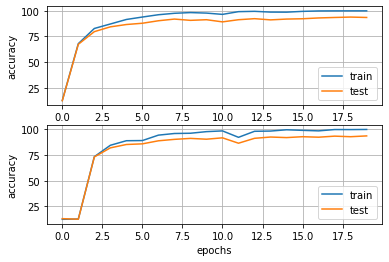

In [6]:
fig = plt.figure()
ax = fig.add_subplot(211)
train_accuracy, val_accuracy = scores[0]

ax.plot(np.arange(len(train_accuracy)), train_accuracy, label="train")
ax.plot(np.arange(len(val_accuracy)), val_accuracy, label="test")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
# ax.set_facecolor('lightgray')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax.legend()

ax = fig.add_subplot(212)
train_accuracy, val_accuracy = scores[1]

ax.plot(np.arange(len(train_accuracy)), train_accuracy, label="train")
ax.plot(np.arange(len(val_accuracy)), val_accuracy, label="test")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
# ax.set_facecolor('lightgray')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax.legend()

In [7]:
def class_wise_accuracy(dataloader):
    correct = {}
    total = {}
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            for l in range(len(labels)):
                label = int(labels[l].cpu().numpy())
                pred = predicted[l]
                if label in correct:
                    correct[label] += int(pred == label)
                    total[label] += 1
                else:
                    correct[label] = int(pred == label)
                    total[label] = 1
    acc = {}
    for label in correct:
        acc[label] = 100 * correct[label] / total[label]
    return acc

In [8]:
class_wise_accuracy(val_loader)

{6: 94.375,
 5: 93.75,
 8: 92.3076923076923,
 1: 97.51552795031056,
 4: 96.40718562874251,
 7: 90.625,
 3: 91.13924050632912,
 2: 92.40506329113924}